In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import new_feature_extractor
import numpy as np
import os
import cv2
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preprocessing
from sklearn import tree
from sklearn import metrics

#### Manually chosen images for train and test set
- Train set: 35 easy and 35 difficult images, total 70
- Test set: 15 easy and 15 difficult images, total 30

#### Images were chosen based on several rules:

- Easy images can be classified using MobileNet
- Easy images have a distinct object, that is clearly outlined 
- Difficult images cannot be classified by any of the used Neural Networks (e.g. Failed)
- Difficult images do not have a clear and distinc object

In [2]:
train_images = [14, 23, 43, 75, 79, 89, 97, 99, 101, 113,
                123, 130, 133, 143, 147, 149, 157, 158, 168, 174,
                178, 188, 208, 211, 213, 223, 247, 266, 283, 314,
                318, 328, 336, 344, 350, 17, 39, 50, 119, 121,
                150, 151, 159, 185, 192, 214, 226, 232, 239, 267,
                269, 277, 279, 292, 295, 310, 320, 331, 339, 345,
                351, 360, 387, 389, 398, 400, 484, 488, 492, 510]

test_images = [356, 370, 375, 391, 399, 417, 441, 451, 477, 548, 554,
               640, 710, 2040, 2477, 543, 561, 566, 584, 652, 
               654, 659, 677, 683, 687, 707, 730, 750, 776, 804]

In [3]:
data = pd.read_csv("feature_values_normalized.csv") #My generated file with normalized and scaled values

In [4]:
temp = [x-1 for x in train_images]
train = data.iloc[temp]
temp = [x-1 for x in test_images]
test = data.iloc[temp]

# Easy images of the testing dataset

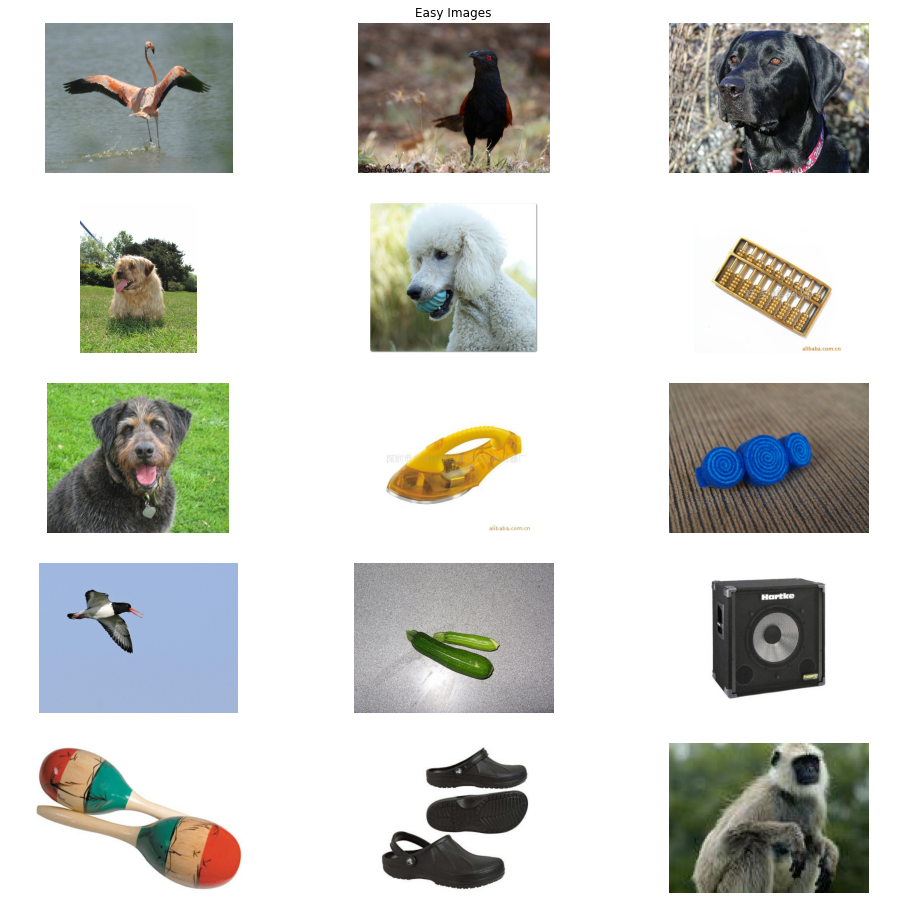

In [5]:
import matplotlib.image as mpimg

temp = test['filename'].tolist()
w=10
h=10
fig=plt.figure(figsize=(16, 16))
plt.title('Easy Images')
plt.axis('off')
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = mpimg.imread('images/val/images/' + temp[i-1])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# Difficult images of the testing dataset

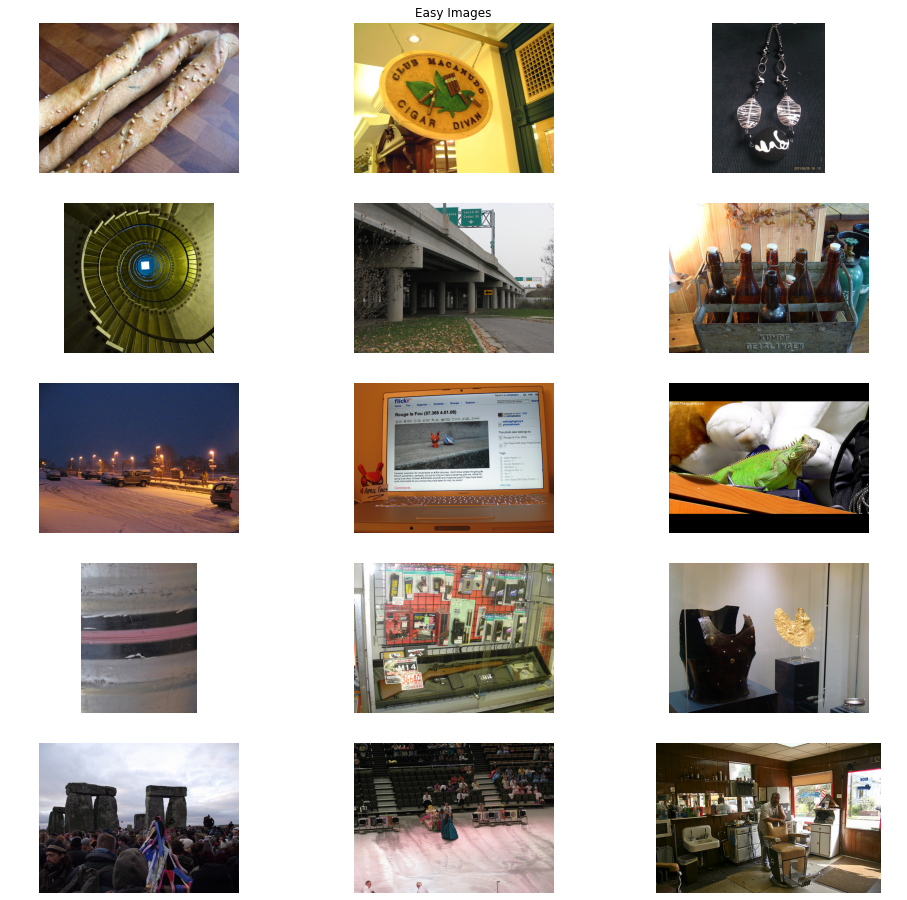

In [6]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
plt.title('Difficult Images')
plt.axis('off')
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = mpimg.imread('images/val/images/' + temp[i+14])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# Testing Dataset

### Half of the dataset is predicted to use Mobilenet, other half is failed

In [7]:
test

,filename,Mobilenet_v1,Inception_v4,Resnet_v1_152,kp_surf,average_perceived_brightness,contrast,area_by_perim,aspect_ratio,edge_length1,hue1
355,ILSVRC2012_val_00000356.JPEG,1,0,0,0.058948,0.373142,-0.192820,0.570339,0.258519,0.541007,-0.402488
369,ILSVRC2012_val_00000370.JPEG,1,0,0,-0.500918,1.177505,1.252335,1.612255,0.379770,1.946934,2.428140
374,ILSVRC2012_val_00000375.JPEG,1,0,0,0.217026,-0.410990,-0.367410,-0.323314,-0.348363,-0.387634,-0.411036
390,ILSVRC2012_val_00000391.JPEG,1,0,0,0.222503,-0.341580,-0.350734,-0.472400,-0.380706,-0.617256,-0.358664
398,ILSVRC2012_val_00000399.JPEG,1,0,0,0.200335,-0.062577,-0.212849,-0.026090,-0.283739,-0.375749,-0.315019
416,ILSVRC2012_val_00000417.JPEG,1,0,0,0.221154,-0.315164,-0.484635,-0.280641,-0.367454,-0.621294,-0.310526
440,ILSVRC2012_val_00000441.JPEG,1,0,0,0.221210,-0.346916,-0.421396,-0.255704,-0.325110,-0.595953,-0.421347
450,ILSVRC2012_val_00000451.JPEG,1,0,0,-1.454379,3.478999,1.296068,1.551040,1.767071,2.600098,2.600521
476,ILSVRC2012_val_00000477.JPEG,1,0,0,0.219412,-0.286660,-0.416450,-0.295897,0.013187,-0.563942,-0.077271
547,ILSVRC2012_val_00000548.JPEG,1,0,0,-0.020532,1.397412,0.018080,0.371857,0.515261,0.124458,-0.477754


In [8]:
#Binary Classification Dataset

X_train = train.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
X_test = test.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
y_train = train[['Mobilenet_v1']]
y_test = test[['Mobilenet_v1']]

Testing Accuracy of the Decision Tree and Logistic Regression with all 7 features

In [9]:
from sklearn.linear_model import LogisticRegression
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
print('Testing accuracy of the Decision Tree:', tree_model.score(X_test, y_test)*100)
print('Testing accuracy of the Logistic Regression:', log_reg_model.score(X_test, y_test)*100)

Testing accuracy of the Decision Tree: 70.0
Testing accuracy of the Logistic Regression: 70.0


Now we remove each feature individually and compare results

{'kp_surf': 70.0, 'average_perceived_brightness': 66.66666666666666, 'contrast': 63.33333333333333, 'area_by_perim': 70.0, 'aspect_ratio': 70.0, 'edge_length1': 70.0, 'hue1': 70.0}


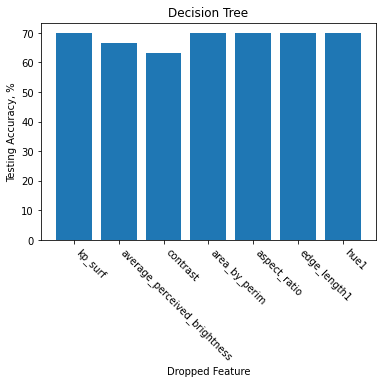

Remove kp_surf...

6 features

Mobilenet: 50.0%
Failed: 50.0%
{'average_perceived_brightness': 63.33333333333333, 'contrast': 66.66666666666666, 'area_by_perim': 56.666666666666664, 'aspect_ratio': 70.0, 'edge_length1': 73.33333333333333, 'hue1': 70.0}


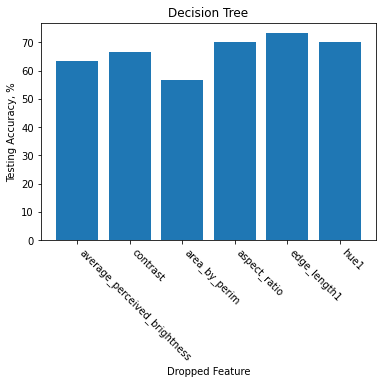

Remove edge_length1...

5 features

Mobilenet: 43.333333333333336%
Failed: 56.666666666666664%
{'average_perceived_brightness': 60.0, 'contrast': 56.666666666666664, 'area_by_perim': 63.33333333333333, 'aspect_ratio': 73.33333333333333, 'hue1': 70.0}


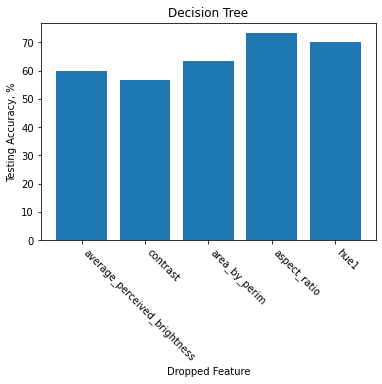

Remove aspect_ratio...

4 features

Mobilenet: 46.666666666666664%
Failed: 53.333333333333336%
{'average_perceived_brightness': 53.333333333333336, 'contrast': 66.66666666666666, 'area_by_perim': 70.0, 'hue1': 76.66666666666667}


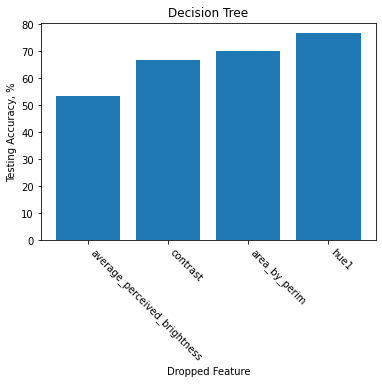

Remove hue1...

3 features

Mobilenet: 46.666666666666664%
Failed: 53.333333333333336%
{'average_perceived_brightness': 56.666666666666664, 'contrast': 70.0, 'area_by_perim': 60.0}


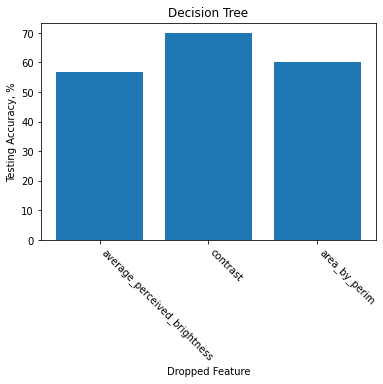

Remove contrast...

2 features

Mobilenet: 50.0%
Failed: 50.0%
{'average_perceived_brightness': 63.33333333333333, 'area_by_perim': 63.33333333333333}


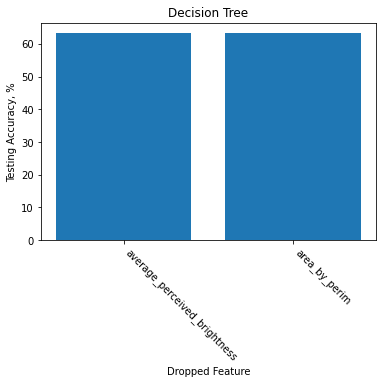

Remove average_perceived_brightness...

1 features

Mobilenet: 46.666666666666664%
Failed: 53.333333333333336%


In [10]:
predictions = {}
predictions['MobileNet'] = test['Mobilenet_v1'].tolist()
features = list(X_train.columns)
while len(features) > 1:
    dt_accs = {}
    for x in features:
        temp_train = X_train.drop([x], axis = 1)
        temp_test = X_test.drop([x], axis = 1)
        tree_model = DecisionTreeClassifier()
        tree_model.fit(temp_train, y_train)
        dt_accs[x] = tree_model.score(temp_test, y_test)*100
    print(dt_accs)
    best_acc = max(dt_accs, key=dt_accs.get)
    plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
    plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
    plt.xticks(rotation=-45, ha='left')
    plt.title('Decision Tree')
    plt.ylabel('Testing Accuracy, %')
    plt.xlabel('Dropped Feature')
    plt.show()
    X_train = X_train.drop([best_acc], axis = 1)
    X_test = X_test.drop([best_acc], axis = 1)
    features.remove(best_acc)
    print(f'Remove {best_acc}...\n', )
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    prediction = tree_model.predict(X_test)
    predictions[len(features)] = prediction.tolist()
    print("{} features\n\nMobilenet: {}%\nFailed: {}%".format(len(features), (prediction == 1).sum()/len(prediction)*100, (prediction == 0).sum()/len(prediction)*100))

In [11]:
predictions = pd.DataFrame.from_dict(predictions)
predictions.head(30)

,MobileNet,6,5,4,3,2,1
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,1,1,1,1,0,1
5,1,1,1,1,1,1,1
6,1,0,1,1,1,1,0
7,1,1,1,1,1,1,0
8,1,1,0,0,0,0,0
9,1,1,1,1,1,1,1


In [12]:
print("The remaining feature for the Decision Tree is", features[0])

The remaining feature for the Decision Tree is area_by_perim


{'kp_surf': 70.0, 'average_perceived_brightness': 56.666666666666664, 'contrast': 70.0, 'area_by_perim': 66.66666666666666, 'aspect_ratio': 70.0, 'edge_length1': 73.33333333333333, 'hue1': 73.33333333333333}


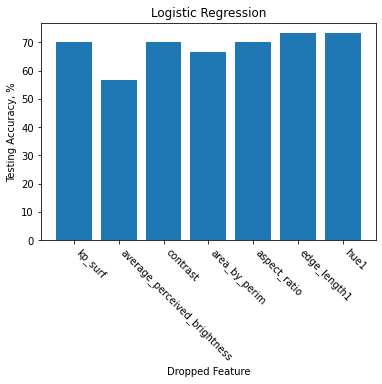

Remove edge_length1...
6 features

Mobilenet: 30.0%
Failed: 70.0%
{'kp_surf': 70.0, 'average_perceived_brightness': 60.0, 'contrast': 70.0, 'area_by_perim': 73.33333333333333, 'aspect_ratio': 70.0, 'hue1': 73.33333333333333}


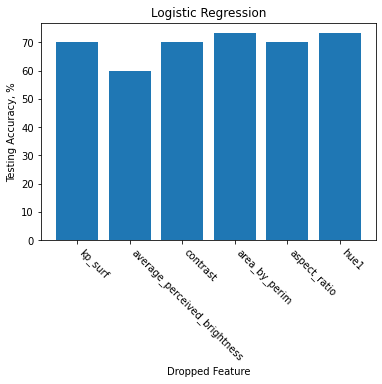

Remove area_by_perim...
5 features

Mobilenet: 23.333333333333332%
Failed: 76.66666666666667%
{'kp_surf': 73.33333333333333, 'average_perceived_brightness': 63.33333333333333, 'contrast': 73.33333333333333, 'aspect_ratio': 70.0, 'hue1': 73.33333333333333}


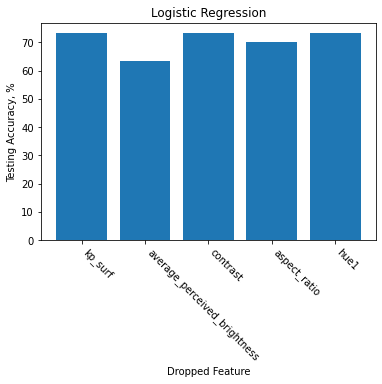

Remove kp_surf...
4 features

Mobilenet: 46.666666666666664%
Failed: 53.333333333333336%
{'average_perceived_brightness': 56.666666666666664, 'contrast': 73.33333333333333, 'aspect_ratio': 70.0, 'hue1': 73.33333333333333}


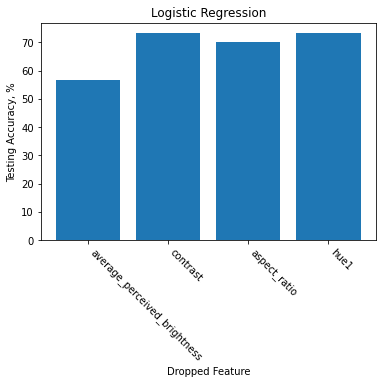

Remove contrast...
3 features

Mobilenet: 30.0%
Failed: 70.0%
{'average_perceived_brightness': 60.0, 'aspect_ratio': 73.33333333333333, 'hue1': 73.33333333333333}


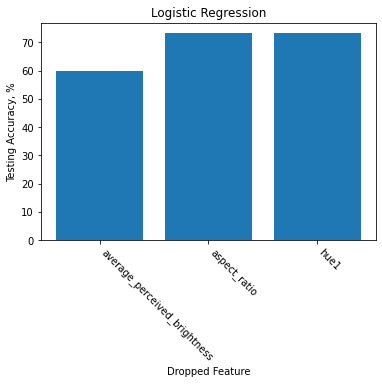

Remove aspect_ratio...
2 features

Mobilenet: 26.666666666666668%
Failed: 73.33333333333333%
{'average_perceived_brightness': 60.0, 'hue1': 73.33333333333333}


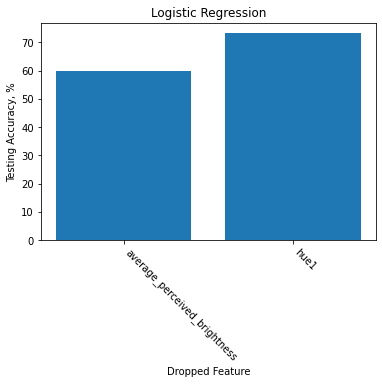

Remove hue1...
1 features

Mobilenet: 30.0%
Failed: 70.0%


In [13]:
X_train = train.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
X_test = test.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
y_train = train[['Mobilenet_v1']]
y_test = test[['Mobilenet_v1']]

# dset = data.iloc[[1921,2732,217,519,745,2941,2622,1693,1987,739,2765,3585,997,1616,596,3063,2710,4383,3570,2247,650,2852,2974,1733,265,2532,84,117,4453,450,2848,283,256,1297,4302,4980,685,2180,2031,557,1494,2368,1779,2144,358,2208,596,1053,4421,2941,4386,4689,217,519,1815,2419,997,1616,1631,1584,493,4856,1826,1294,1766,1322,4540,2036,1097,2256,3427,1681,1526,1963,2566,2208,1815,2941,4386,1778,2765,2148,3507,732,1053,3540,4421,1616,1584,3878,295,3466,316,4607,1419,428,125,3249,33,2450,1027,3155,2735,2693,1659]]
# X = dset.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
# y = dset[['Mobilenet_v1']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
predictions = {}
predictions['MobileNet'] = test['Mobilenet_v1'].tolist()
features = list(X_train.columns)
while len(features) > 1:
    dt_accs = {}
    lr_accs = {}
    for x in features:
        temp_train = X_train.drop([x], axis = 1)
        temp_test = X_test.drop([x], axis = 1)
        log_reg_model = LogisticRegression()
        log_reg_model.fit(temp_train, y_train)
        lr_accs[x] = log_reg_model.score(temp_test, y_test)*100
    print(lr_accs)
    best_acc = max(lr_accs, key=lr_accs.get)
    plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
    plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
    plt.xticks(rotation=-45, ha='left')
    plt.title('Logistic Regression')
    plt.ylabel('Testing Accuracy, %')
    plt.xlabel('Dropped Feature')
    plt.show()
    X_train = X_train.drop([best_acc], axis = 1)
    X_test = X_test.drop([best_acc], axis = 1)
    features.remove(best_acc)
    print(f'Remove {best_acc}...', )
    log_reg_model = LogisticRegression()
    log_reg_model.fit(temp_train, y_train)
    prediction = log_reg_model.predict(X_test)
    predictions[len(features)] = prediction.tolist()
    print("{} features\n\nMobilenet: {}%\nFailed: {}%".format(len(features), (prediction == 1).sum()/len(prediction)*100, (prediction == 0).sum()/len(prediction)*100))

In [14]:
predictions = pd.DataFrame.from_dict(predictions)
predictions.head(30)

,MobileNet,6,5,4,3,2,1
0,1,1,1,0,1,1,1
1,1,1,0,0,0,0,1
2,1,0,0,1,0,0,0
3,1,0,0,1,0,0,0
4,1,1,0,1,1,1,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,1,1,1,0,1,1,1
8,1,0,0,0,0,0,0
9,1,1,1,0,1,1,1


In [15]:
print("The remaining feature for the Logistic Regression is", features[0])

The remaining feature for the Logistic Regression is average_perceived_brightness


# Max Feature Dataset
**Just to compare the results, below I use another dataset. This dataset contains images with maximum feature values (largest # of keypoints, longest edges, etc.)**

In [16]:
#Dataset with max feature values

dset = data.iloc[[1921,2732,217,519,745,2941,2622,1693,1987,739,2765,3585,997,1616,596,3063,2710,4383,3570,2247,650,2852,2974,1733,265,2532,84,117,4453,450,2848,283,256,1297,4302,4980,685,2180,2031,557,1494,2368,1779,2144,358,2208,596,1053,4421,2941,4386,4689,217,519,1815,2419,997,1616,1631,1584,493,4856,1826,1294,1766,1322,4540,2036,1097,2256,3427,1681,1526,1963,2566,2208,1815,2941,4386,1778,2765,2148,3507,732,1053,3540,4421,1616,1584,3878,295,3466,316,4607,1419,428,125,3249,33,2450,1027,3155,2735,2693,1659]]
X = dset.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
y = dset[['Mobilenet_v1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
print('Testing accuracy of the Decision Tree:', tree_model.score(X_test, y_test)*100)
print('Testing accuracy of the Logistic Regression:', log_reg_model.score(X_test, y_test)*100)

Testing accuracy of the Decision Tree: 77.14285714285715
Testing accuracy of the Logistic Regression: 77.14285714285715


Now we remove each feature individually and compare results

{'kp_surf': 77.14285714285715, 'average_perceived_brightness': 74.28571428571429, 'contrast': 80.0, 'area_by_perim': 80.0, 'aspect_ratio': 68.57142857142857, 'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


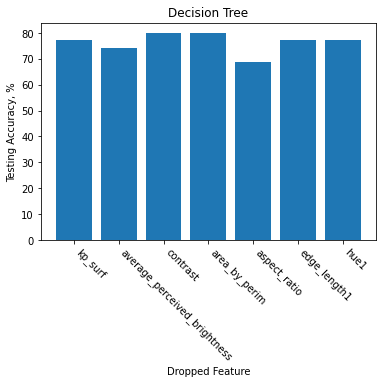

Remove contrast...
6 features

Mobilenet: 74.28571428571429%
Failed: 25.71428571428571%
{'kp_surf': 85.71428571428571, 'average_perceived_brightness': 68.57142857142857, 'area_by_perim': 77.14285714285715, 'aspect_ratio': 62.857142857142854, 'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


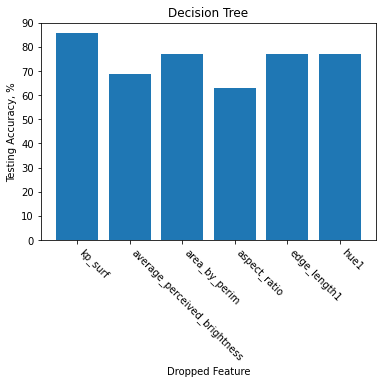

Remove kp_surf...
5 features

Mobilenet: 77.14285714285715%
Failed: 22.857142857142858%
{'average_perceived_brightness': 80.0, 'area_by_perim': 85.71428571428571, 'aspect_ratio': 74.28571428571429, 'edge_length1': 80.0, 'hue1': 77.14285714285715}


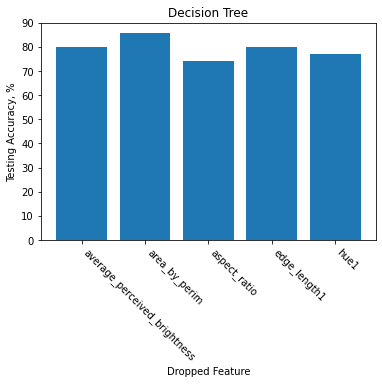

Remove area_by_perim...
4 features

Mobilenet: 80.0%
Failed: 20.0%
{'average_perceived_brightness': 77.14285714285715, 'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 82.85714285714286}


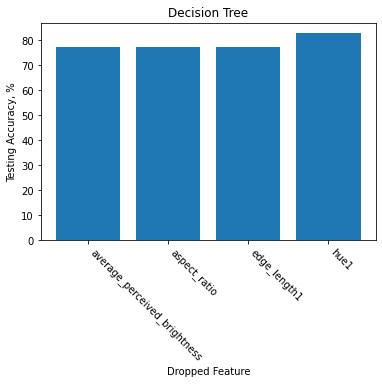

Remove hue1...
3 features

Mobilenet: 82.85714285714286%
Failed: 17.142857142857142%
{'average_perceived_brightness': 77.14285714285715, 'aspect_ratio': 74.28571428571429, 'edge_length1': 71.42857142857143}


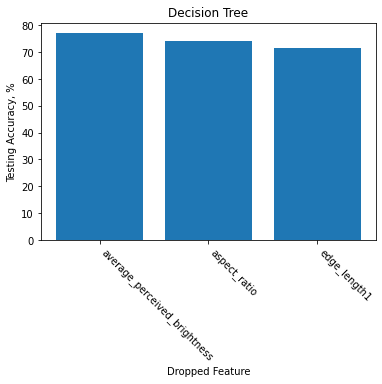

Remove average_perceived_brightness...
2 features

Mobilenet: 71.42857142857143%
Failed: 28.57142857142857%
{'aspect_ratio': 80.0, 'edge_length1': 71.42857142857143}


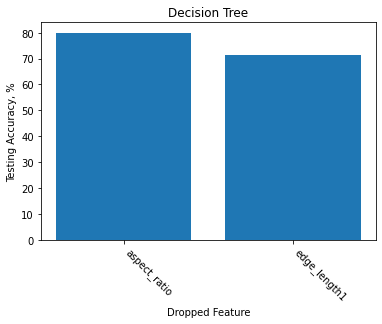

Remove aspect_ratio...
1 features

Mobilenet: 80.0%
Failed: 20.0%


In [18]:
predictions = {}
# predictions['Original'] = test['Mobilenet_v1'].tolist()
features = list(X_train.columns)
while len(features) > 1:
    dt_accs = {}
    for x in features:
        temp_train = X_train.drop([x], axis = 1)
        temp_test = X_test.drop([x], axis = 1)
        tree_model = DecisionTreeClassifier()
        tree_model.fit(temp_train, y_train)
        dt_accs[x] = tree_model.score(temp_test, y_test)*100
    print(dt_accs)
    best_acc = max(dt_accs, key=dt_accs.get)
    plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
    plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
    plt.xticks(rotation=-45, ha='left')
    plt.title('Decision Tree')
    plt.ylabel('Testing Accuracy, %')
    plt.xlabel('Dropped Feature')
    plt.show()
    X_train = X_train.drop([best_acc], axis = 1)
    X_test = X_test.drop([best_acc], axis = 1)
    features.remove(best_acc)
    print(f'Remove {best_acc}...', )
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    prediction = tree_model.predict(X_test)
    predictions[len(features)] = prediction.tolist()
    print("{} features\n\nMobilenet: {}%\nFailed: {}%".format(len(features), (prediction == 1).sum()/len(prediction)*100, (prediction == 0).sum()/len(prediction)*100))

In [19]:
len(predictions[3])

35

In [20]:
predictions = pd.DataFrame.from_dict(predictions)
predictions.head(30)

,6,5,4,3,2,1
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,0,0
7,1,1,1,1,1,1
8,1,1,1,1,1,1
9,1,1,1,1,1,1


In [21]:
print("The remaining feature for the Decision Tree is", features[0])

The remaining feature for the Decision Tree is edge_length1


{'kp_surf': 77.14285714285715, 'average_perceived_brightness': 77.14285714285715, 'contrast': 77.14285714285715, 'area_by_perim': 77.14285714285715, 'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 74.28571428571429}


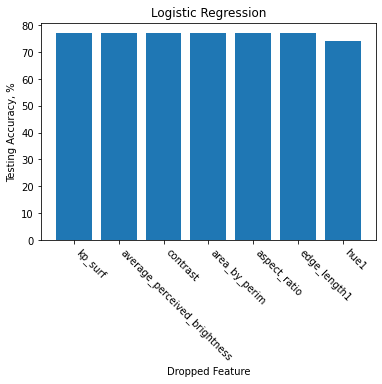

Remove kp_surf...
6 features

Mobilenet: 97.14285714285714%
Failed: 2.857142857142857%
{'average_perceived_brightness': 77.14285714285715, 'contrast': 77.14285714285715, 'area_by_perim': 77.14285714285715, 'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 74.28571428571429}


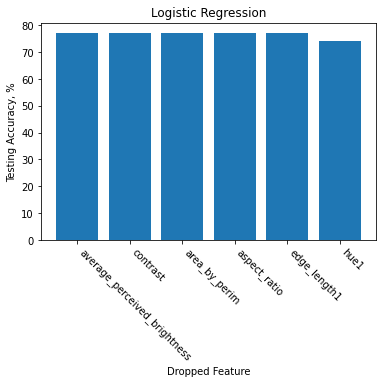

Remove average_perceived_brightness...
5 features

Mobilenet: 94.28571428571428%
Failed: 5.714285714285714%
{'contrast': 77.14285714285715, 'area_by_perim': 77.14285714285715, 'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


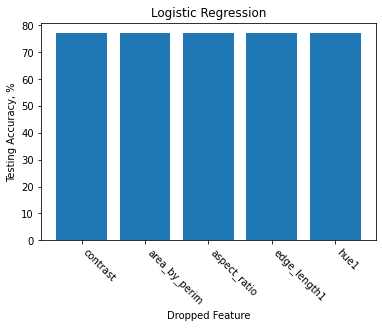

Remove contrast...
4 features

Mobilenet: 94.28571428571428%
Failed: 5.714285714285714%
{'area_by_perim': 77.14285714285715, 'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


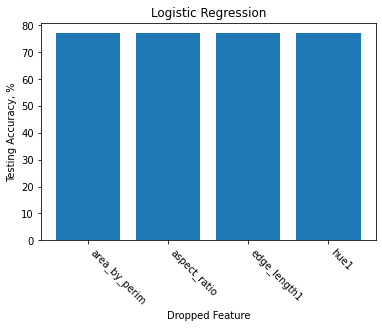

Remove area_by_perim...
3 features

Mobilenet: 94.28571428571428%
Failed: 5.714285714285714%
{'aspect_ratio': 77.14285714285715, 'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


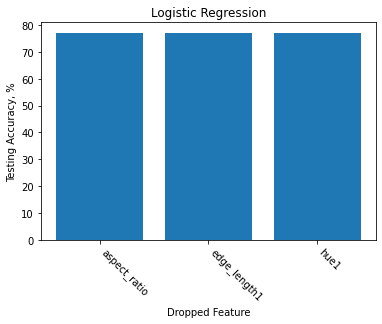

Remove aspect_ratio...
2 features

Mobilenet: 100.0%
Failed: 0.0%
{'edge_length1': 77.14285714285715, 'hue1': 77.14285714285715}


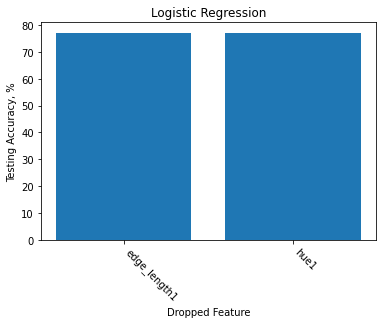

Remove edge_length1...
1 features

Mobilenet: 100.0%
Failed: 0.0%


In [22]:
dset = data.iloc[[1921,2732,217,519,745,2941,2622,1693,1987,739,2765,3585,997,1616,596,3063,2710,4383,3570,2247,650,2852,2974,1733,265,2532,84,117,4453,450,2848,283,256,1297,4302,4980,685,2180,2031,557,1494,2368,1779,2144,358,2208,596,1053,4421,2941,4386,4689,217,519,1815,2419,997,1616,1631,1584,493,4856,1826,1294,1766,1322,4540,2036,1097,2256,3427,1681,1526,1963,2566,2208,1815,2941,4386,1778,2765,2148,3507,732,1053,3540,4421,1616,1584,3878,295,3466,316,4607,1419,428,125,3249,33,2450,1027,3155,2735,2693,1659]]
X = dset.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
y = dset[['Mobilenet_v1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

predictions = {}
# predictions['Original'] = test['Mobilenet_v1'].tolist()
features = list(X_train.columns)
while len(features) > 1:
    dt_accs = {}
    lr_accs = {}
    for x in features:
        temp_train = X_train.drop([x], axis = 1)
        temp_test = X_test.drop([x], axis = 1)
        log_reg_model = LogisticRegression()
        log_reg_model.fit(temp_train, y_train)
        lr_accs[x] = log_reg_model.score(temp_test, y_test)*100
    print(lr_accs)
    best_acc = max(lr_accs, key=lr_accs.get)
    plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
    plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
    plt.xticks(rotation=-45, ha='left')
    plt.title('Logistic Regression')
    plt.ylabel('Testing Accuracy, %')
    plt.xlabel('Dropped Feature')
    plt.show()
    X_train = X_train.drop([best_acc], axis = 1)
    X_test = X_test.drop([best_acc], axis = 1)
    features.remove(best_acc)
    print(f'Remove {best_acc}...', )
    log_reg_model = LogisticRegression()
    log_reg_model.fit(temp_train, y_train)
    prediction = log_reg_model.predict(X_test)
    predictions[len(features)] = prediction.tolist()
    print("{} features\n\nMobilenet: {}%\nFailed: {}%".format(len(features), (prediction == 1).sum()/len(prediction)*100, (prediction == 0).sum()/len(prediction)*100))

In [23]:
predictions = pd.DataFrame.from_dict(predictions)
predictions.head(30)

,6,5,4,3,2,1
0,1,1,1,1,1,1
1,1,0,0,0,1,1
2,0,0,0,0,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,1,1,1,1,1
9,1,1,1,1,1,1


In [24]:
print("The remaining feature for the Logistic Regression is", features[0])

The remaining feature for the Logistic Regression is hue1
